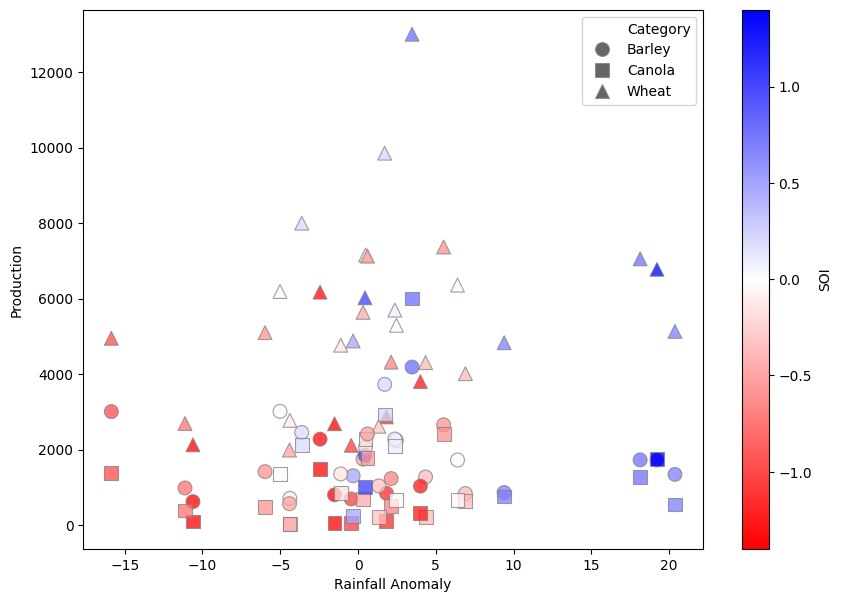

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

merge_df = pd.read_csv("../../Data/Merged Data.csv")
weather_df = pd.read_csv("../../Data/Quarterly Weather Data.csv")
soi_df = pd.read_csv("SOI_ONI_ENSO.csv")

soi_df["Date"] = pd.to_datetime(soi_df["Date"])

merge_df["Date"] = pd.to_datetime(merge_df["Date"])
merge_df = merge_df.loc[:,["Date","ABARES: Barley - Production ($M)","ABARES: Canola - Production ($M)","ABARES: Wheat - Production ($M)"]].rename(columns={"ABARES: Barley - Production ($M)":"Barley","ABARES: Canola - Production ($M)":"Canola","ABARES: Wheat - Production ($M)":"Wheat"})
merge_df = merge_df.melt(id_vars = "Date", value_vars = merge_df.columns[1:], value_name = "Production", var_name = "Category")

weather_df["Date"] = pd.to_datetime(weather_df["Date"])

new_df = merge_df.merge(soi_df, on = "Date", how = "left").merge(weather_df, on = "Date", how = "left")
new_df["Date"] = new_df["Date"].dt.year
graph_df = new_df.groupby(["Date", "Category"])[["Production", "SOI", "Total Rainfall", "Rainfall Anomaly", "Temperature Anomaly"]].mean().reset_index()

plt.figure(figsize = (10,7))
ax = sns.scatterplot(data = graph_df, x = "Rainfall Anomaly", y = "Production", hue = "SOI", style = "Category", palette = "bwr_r", alpha = 0.75, s = 100, markers = {"Barley":"o", "Canola":"s", "Wheat":"^"}, edgecolor="grey")

norm = plt.Normalize(-graph_df["SOI"].max(), graph_df["SOI"].max())
sm = plt.cm.ScalarMappable(cmap = "bwr_r", norm = norm)
sm.set_array([])

h,l = ax.get_legend_handles_labels()
plt.legend(h[-4:],l[-4:], loc=1, borderaxespad=0.5)
colourbar = ax.figure.colorbar(sm, ax = ax)
colourbar.set_label("SOI")

plt.show()